<a href="https://colab.research.google.com/github/damon022002/MOD10-Web-Science/blob/main/week1/WS_week1_project/week1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Week 1                                     <a id="chapter1"></a>
# Table of Contents

* [Project Week 1                                    ](#chapter1)
* [Student details](#chapter2)
* [Project Description                                         ](#chapter3)
* [Data                                    ](#chapter4)
* [Predictive Power of Tie Strength                                    ](#chapter5)
* [Predictive Power of the Number of Open Triades                                    ](#chapter6)
* [Ranking Friends of Friends                                    ](#chapter7)
* [Under construction                          ](#chapter8)


# Student details <a id="chapter2"></a>

Please enter the student numbers and names in the cell below.

[Damon Kaewborisut s2532409] [Harry Braam s2562952] 




# Project Description                                          <a id="chapter3"></a>



Faculty employees at research universities have two major activities: teaching and research. The research is often done in collaboration with colleagues, which results in a joint publication. In this project we will analyse collaborations within the EWI department of the University of Twente based on joint publications. Such investigations are important in order to enhance the research results and applications, and in order to allocate the limited funding to the right research groups and topics.

We represent each researcher as a vertex of a graph. We draw an undirected edge between two vertexes, if the corresponding two researchers have published a joint paper. The resulting graph is called a collaboration graph. We may label each edge as a weak or strong tie depending on the number of joint papers.
In this project we want to verify the following hypotheses:


In this project we want to verify the following hypotheses:

*	The collaborations adhere to the strong triadic closure property: if two researchers A and C both actively collaborate with researcher B, then the chance is high that A and C will collaborate in the future.
*	The large number of open triades, in which two researchers participate, implies that there is a high probability that the two researchers will collaborate in the future.

You task is to explore the given data and make a case whether or not the above hypotheses are true. Additionally, you will have to develop an algorithm that ranks friends of friends by decreasing likelihood of becoming a friend in the future.

In [ ]:
# The following includes are needed to work with graphs and display solutions.
%matplotlib inline
# Extra package need to be installed on Google Colab.
!apt install libgraphviz-dev
!pip install pygraphviz
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from IPython.display import display
from collections import Counter
from utils import *
from graphs import *
import utils
import graphs
import random


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 5 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main 

# Data                                     <a id="chapter4"></a>
The project is based on the UT collaboration graph. We made snapshots of the UT collaboration graph up to 1995 and up to 2015. The number of publications written by two researchers is noted as the weight of this edge. The following two statements load the collaborations up to these years. Note that they take some time to complete.

In [ ]:
G1995 = utils.fromDot(open('bib-graph-1995.dot').read())
G2015 = utils.fromDot(open('bib-graph-2015.dot').read())

For example, in 1995, the researcher 283261 collaborated with researcher 176766, 520454, 617192, 729772, and 797848 and wrote with them 1, 6, 1, 5, and 2 papers respectively. This can be seen as follows:

In [ ]:
G1995['283261']


AdjacencyView({'617192': {0: {'weight': '1.000000'}}, '729772': {0: {'weight': '5.000000'}}, '520454': {0: {'weight': '6.000000'}}, '797484': {0: {'weight': '2.000000'}}, '176766': {0: {'weight': '1.000000'}}})

# Predictive Power of Tie Strength                                     <a id="chapter5"></a>

Show that the probability of a new collaboration to be formed in an open triangle A -- C -- B is increasing with the strength of A -- C and C -- B, using a regression prediction. The tie strength is defined as $\frac{(x+y)}{2}$, where $x$ is the number of collaborations between A and C, and $y$ is the number of collaborations between B and C. The probability is defined as the chance that a new edge has formed between A and B between the G1995 and G2015 graph. You have to draw a  graph (with axis's lables and units) to illustrate your answer.


[['399737', '213482', '886525', 1.0], ['399737', '213482', '498789', 3.5], ['399737', '213482', '729802', 2.0], ['399737', '213482', '586811', 1.5], ['399737', '213482', '422460', 1.5], ['399737', '213482', '37245', 4.5], ['399737', '213482', '657652', 5.0], ['399737', '213482', '26059', 2.0], ['399737', '213482', '897180', 2.0], ['399737', '213482', '901612', 1.0], ['399737', '213482', '60541', 2.5], ['399737', '213482', '140616', 1.0], ['399737', '213482', '485657', 4.0], ['399737', '213482', '41963', 19.5], ['399737', '213482', '717864', 1.5], ['399737', '213482', '573244', 4.0], ['399737', '213482', '408600', 4.5], ['399737', '213482', '347203', 1.5], ['399737', '213482', '14499', 1.0], ['399737', '213482', '199058', 1.0], ['399737', '213482', '911605', 2.5], ['399737', '213482', '81278', 1.0], ['399737', '213482', '382148', 1.0], ['399737', '213482', '654342', 5.0], ['399737', '213482', '901993', 6.0], ['399737', '213482', '9418', 1.0], ['399737', '213482', '951483', 6.0], ['39973

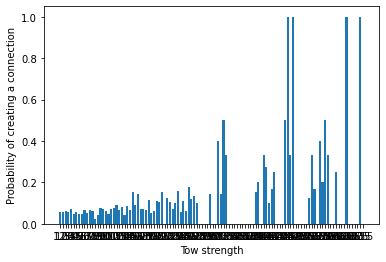

slope m: 0.002859424271723539/t and the intercept b: 0.03702367805136435


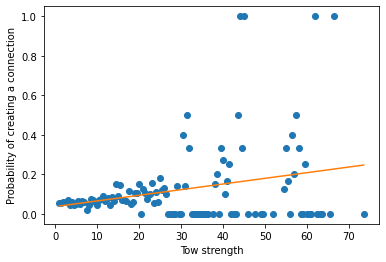

In [26]:
# BEGIN SOLUTION
#search open triangles
diction = []
for person in G1995.nodes():
  neighbors = list(G1995[person].keys())
  for i in range(len(neighbors)):
      for j in range(i+1, len(neighbors)):
        Node1 =  neighbors[i]
        Node2 =  neighbors[j]
        if not Node1 in G1995[Node2]:       #so neigh 1 and 2 of X are not neighbors with each other
          diction.append([Node1, person ,Node2])


#check tie strength
for triangle in diction:
  tie_weight = 0
  neighbors = G1995[triangle[1]]
  for neighbor in neighbors: # get all the neighbours of node C
    if neighbor in triangle: # if the neighbour in the traingle add it
      tie_weight = float(neighbors.get(neighbor).get(0).get('weight')) + tie_weight
  triangle.append(tie_weight/2)

print(diction)




#later check if there was a connection
# diction = ["A", "b", "C",10]

for triangle in diction:
    Node1 = triangle[0]
    Node2 = triangle[2]
    triangle.append(int(Node1 in G2015[Node2]))
     #so neigh 1 and 2 of X are not neighbors after 20 years
print(diction)
# diction = ["A", "b", "C",10, True]

# assume no deletion of edges

dictionA = {}
for triangle in diction:
    # print(triangle[4])
    if dictionA.get(triangle[3]) == None:
        dictionA[triangle[3]] = [triangle[4]]
    else: 
        # print(dictionA.get(triangle[3]))
        dictionA[triangle[3]] = dictionA.get(triangle[3]) + [triangle[4]]

print(dictionA)
print(dictionA.keys())

#probs:
dictProb = {}
for key in sorted(dictionA.keys()):
  dictProb[key] = sum(dictionA.get(key))/ len(dictionA.get(key))
print(dictProb)

names = list(dictProb.keys())
values = list(dictProb.values())

plt.bar(range(len(dictionA)), values, tick_label=names)
plt.xlabel("Tow strength")
plt.ylabel("Probability of creating a connection")
plt.show()

#plot with scatterplot

# http://faculty.cas.usf.edu/mbrannick/regression/regbas.html
#create basic scatterplot

x = np.array(list(dictProb.keys()))
y = np.array(list(dictProb.values()))
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
print("slope m: {}/t and the intercept b: {}".format(m,b) )
#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.xlabel("Tow strength")
plt.ylabel("Probability of creating a connection")
plt.show()

# END SOLUTION


# END SOLUTION


*Explanation: (Explanation for the proposed agorithm must be added here. The code above also needs comments in details for clarity and comprehension) 

Our algorithm works by first making a list off all open triangles with a smart trick with some inspiration from the assignments. After that we calculate the tie strength of every triangle and also store that in the list of the triangle. We then search up the same triangle in the 2015 data and check if a connection was made. This data is also added in the list of triangle after this we end up with a list that looks like this [[A, B, C, tie-strength, boolean based on open or close in 2015], [xx]...]. After that we show the data in two graphs. The first graph is bar chart with the x-as being the tie strength and the y-ax being the probability that a triangle at that tie strength has been closed in the 2015 dataset. The second chart shows the same but is a clearer manner and a regression line was also added.

# Predictive Power of the Number of Open Triades                                     <a id="chapter6"></a>

Find a regression model to evaluate whether the number of open triades influences the probability that a new collaboration is formed between 1995 and 2015. For example, node A and C do not have an edge, but could be connected by B (one open triad), A and D (two open triades) or even A, D and E (three open triades) and so forth. You have to draw a graph (with axis's lables and units) to illustrate your answer.


dictOpenTraides: All pair Nodes with atleast 1 open traide
 {'399737--886525': 1, '399737--498789': 2, '399737--729802': 2, '399737--586811': 2, '399737--422460': 1, '399737--37245': 2, '399737--657652': 2, '399737--26059': 2, '399737--897180': 2, '399737--901612': 1, '399737--60541': 2, '399737--140616': 2, '399737--485657': 2, '399737--41963': 2, '399737--717864': 2, '399737--573244': 2, '399737--408600': 2, '399737--347203': 2, '399737--14499': 2, '399737--199058': 1, '399737--911605': 3, '399737--81278': 2, '399737--382148': 2, '399737--654342': 2, '399737--901993': 2, '399737--9418': 2, '399737--951483': 2, '399737--310532': 2, '399737--939838': 2, '399737--450166': 2, '399737--652488': 2, '399737--978812': 2, '399737--32000': 2, '399737--265464': 2, '399737--96811': 2, '399737--676753': 2, '399737--554748': 2, '399737--441435': 2, '399737--136755': 2, '399737--996843': 2, '399737--392383': 2, '399737--906277': 2, '399737--955237': 2, '886525--498789': 1, '886525--134604': 1, '88

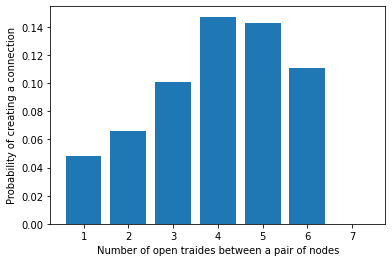

slope m: 0.016834114495935103/t and the intercept b: 0.04388378410906184


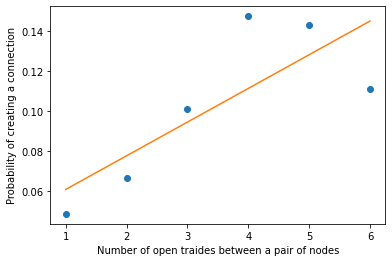

In [34]:
# BEGIN SOLUTION

#check how many open traides 2 nodes have

# listOpenTriades = [["A--B", 0]] 
dictOpenTraides = {} #includes 0 open triades?

#for each person we check if it involved with a open traides
for person in G1995.nodes():
  neighbors = list(G1995[person].keys())
  # then we compare each neighbor of person with each other if those 3 create a open triades
  for i in range(len(neighbors)):
      for j in range(i+1, len(neighbors)):
        Node1 =  neighbors[i]
        Node2 =  neighbors[j]
        if not Node1 in G1995[Node2]:       #so neigh 1 and 2 of X are not neighbors with each other so open Triades
          key = Node1 + "--" + Node2
          # then we will increase the amount of open traides the pair Node 1 and 2 has by 1
          if dictOpenTraides.get(key) == None:
            dictOpenTraides[key] = 1
          else:
             dictOpenTraides[key] += 1
print("\ndictOpenTraides: All pair Nodes with atleast 1 open traide\n", dictOpenTraides)

#later check if there was a connection per pair Nodes
# dictConnect [key is pair and value is if it is connected or not]
dictConnect = {} #includes 0 open triades?
for key in dictOpenTraides:
  nodes = key.split("--")
  Node1 = nodes[0]
  Node2 = nodes[1]
  dictConnect[key] = int(Node1 in G2015[Node2])
    #so neigh 1 and 2 of X are not neighbors after 20 years
print("\ndictConnect: all pair Nodes form dictOpenTraides and check if edge was created in 2015\n", dictConnect)


#combine all the data of each pair Nodes with a certain number of open triades
dictCombine = {}
for i, (pair,traides) in enumerate(dictOpenTraides.items()):
  # print(traides)
  if dictCombine.get(traides) == None:
      dictCombine[traides] = [dictConnect[pair]]
  else: 
      dictCombine[traides] = dictCombine.get(traides) + [dictConnect[pair]]
print("\ndictCombine:sort all data to certain number of open triades if edge or not \n",dictCombine)

#calculate prob.
dictA = {}
print(dictCombine.get(6))
print(dictCombine.get(7))   #is a outliner!
for key in sorted(dictCombine.keys()):
  dictA[key] = sum(dictCombine.get(key))/ len(dictCombine.get(key))
print("\ndictA: average of the dictCombine whether an edge was created with a number of open traides \n",dictA)


#plot it
#axis labels and units! plus regression model!

names2 = list(dictA.keys())
values2 = list(dictA.values())

plt.bar(range(len(dictA)), values2, tick_label=names2)
plt.xlabel("Number of open traides between a pair of nodes")
plt.ylabel("Probability of creating a connection")
plt.show()

#plot with scatterplot

# https://www.statology.org/scatterplot-with-regression-line-python/ 
#create basic scatterplot

x = np.array(list(dictA.keys())[:(len(dictA)-1)])
y = np.array(list(dictA.values())[:(len(dictA)-1)])
plt.plot(x, y, 'o')
plt.xlabel("Number of open traides between a pair of nodes")
plt.ylabel("Probability of creating a connection")

#obtain m (slope) and b(intercept) of linear regression line
m2, b2 = np.polyfit(x, y, 1)
print("slope m: {}/t and the intercept b: {}".format(m2,b2) )
#add linear regression line to scatterplot 
plt.plot(x, m2*x+b2)
plt.show()
# END SOLUTION




* *cursieve tekst*Explanation: (Explanation for the proposed agorithm must be added here. The code above also needs comments in details for clarity and comprehension) 

for this algorithm we calculate for each number of open traides, if an connection/edge has been formed between 2 nodes. So we calculate the real probability of creating an connection between 1995 and 2015 for 1 open traid, 2 and etc. This will give the following first bargraph with the probability of creation a edge for each number of open traides between a pair nodes, because there was only 1 pair that had 7 open traides, we decided to make it an outliner to make a better regression line that will used for 'Ranking Friends of Friends'. In the second graph shows the regression line without the pair of 7 open traides.


# Ranking Friends of Friends                                     <a id="chapter7"></a>

In this exercise you should apply your knowlege gained from the two previous exercises, but not limted to, to answer a common problem in todays social media platforms: given a person, an employee in our case, generate a ranked list of his friends of friends that are likely to become his friends. At the end of the following cell, we provide a code snippet that calculates the precision of your algorithm in predicting future ties in the top-10. Note that other knowledge you gained in the lectures also can be used to solve this problem.

In [35]:
# employees to test
nodes = ['943855', '587677', '905252', '839906', '554748', '220387', '456096', '136755', '652488', '617192', '154879', '860536', '127930', '266261', '925761', '334823', '879631', '922044', '485657', '347203']
# dictionary mapping an employee to a list of employees with whom he/she collaborated in 2015 and which belonged
# to his friends of friends in 1995. 
result = {'879631': ['587677', '265264', '925761', '860536', '725186', '721127', '142327', '23872', '943855'], '127930': ['26850', '935705', '136755', '659445', '805057', '293364', '681672', '565759', '868762', '596394'], '154879': ['691913', '817338', '659445', '169325', '542646', '644335', '293364', '165240', '485657', '905252', '408618'], '587677': ['879631', '725186', '785747', '70007', '561122', '136755', '721127', '142327', '72828', '334823', '839906', '433369', '943855'], '266261': ['265264', '208388', '70007', '495819', '725186', '839906', '136755', '721127', '142327', '408600'], '860536': ['811970', '879631', '456096', '839906', '396817', '136755', '653075', '72828', '596215', '346572', '922044'], '839906': ['587677', '308351', '860536', '378229', '240448', '379649', '334823', '201753', '565759', '943855', '174262', '922044', '266261'], '347203': ['265464', '578175', '136755', '596215', '220387', '906277', '897180', '652488'], '617192': ['793831', '254964', '522310', '932010', '528813', '922964', '485657', '58492', '694245', '166980', '905252'], '136755': ['811970', '127930', '587677', '266261', '815411', '422460', '860536', '347203', '943855', '691913', '174262', '922044'], '925761': ['879631', '725186', '456096', '70007', '561122', '136803', '596215', '334823', '905252', '943855'], '554748': ['23872', '916957', '659445', '169325', '644335', '293364', '220387', '433369', '943855', '174262', '922044', '652488'], '334823': ['587677', '725186', '785747', '839906', '721127', '142327', '72828', '925761', '943855', '867536'], '220387': ['450166', '571150', '565465', '901612', '554748', '18282', '883925', '347203', '9418', '943855', '265464', '652488'], '485657': ['811970', '154879', '617192', '702341', '41963', '661899', '293364', '668817', '218489'], '905252': ['23872', '742360', '561250', '523695', '222137', '617192', '564846', '925761', '661899', '571150', '154879', '691913', '392536'], '943855': ['265264', '60541', '220387', '14499', '783415', '679997', '811970', '785747', '961828', '587677', '925761', '905502', '561122', '136755', '41963', '554748', '879631', '642974', '725186', '676753', '839906', '213482', '396817', '721127', '576951', '334823', '978812'], '456096': ['206983', '925761', '706765', '860536', '565708', '296067', '902949', '549825', '201753', '961828', '240448', '922044'], '922044': ['456096', '308351', '860536', '839906', '136755', '554748', '433369', '999230', '240448'], '652488': ['602959', '60541', '846007', '143158', '347203', '422460', '14499', '554748', '220387', '265464', '9418']}

def fof(G,n):
    '''
    returns the friends of friends of Node n in Graph G
    '''
    res = set()
    for n1 in G[n]:
        res = res | set(G[n1])
    res = res - set(G[n])
    return res

# BEGIN SOLUTION
# END SOLUTION

def score(n, f):
    '''
    calculates a score by which potential friends should be sorted
    '''
    s = 0
    # BEGIN SOLUTION
    # Calculate the strength of the conection between the node and potantial friend
    for neighbour in G1995[n]:
      if f in G1995[neighbour]:
        towStrength =(float(G1995[n].get(neighbour).get(0).get('weight')) + float(G1995[neighbour].get(f).get(0).get('weight')))/2
        s += m*(towStrength/2) + b

    # Calculate the number of shared neighbours
    num_connect = 0
    for neighbor in G1995[n]:
      if neighbor in G1995[f]:
        num_connect += 1
        
    # change the score based on the number of shared friends
    # the slope is calculated in 
    s +=  m2*num_connect + b2

    # END SOLUTION
    #print(s)
    return s

# Check 
topn = 10
total_found = 0
for n in nodes:
    # get all friends of friends and their score
    fofG1995 = fof(G1995, n)
    l = [(f,score(n,f)) for f in fofG1995 ]
    # sort descending by score
    l.sort(key=lambda x: -x[1])
    # count number of correct results
    found = 0
    for x,z in l[:topn]:
        if x in result[n]:
            found += 1   
    total_found += found         
    print(n, found / float(topn))
print(total_found, total_found/200)

943855 0.6
587677 0.5
905252 0.1
839906 0.4
554748 0.1
220387 0.2
456096 0.2
136755 0.3
652488 0.2
617192 0.2
154879 0.4
860536 0.3
127930 0.3
266261 0.4
925761 0.3
334823 0.4
879631 0.1
922044 0.4
485657 0.1
347203 0.4
59 0.295


*Explanation: (Explanation for the proposed agorithm must be added here. The code above also needs comments in details for clarity and comprehension)


For our algorithm we first calculate the tie-strength of the triangle containing node mutual friend and potential friend. Based on regressions lines which where created in assignment 1 and 2.by using the regression lines of both tow Strength and number of open traids, we can calculate the probability that an edge will be created between the 2 Nodes. Both calculations will be simply added to each other and this gave us an average score of 0.295